
# Credit Spread Arbitrage: Leveraging Discrepancies in Credit Spreads

## Overview
Credit spread arbitrage is a strategy that seeks to exploit price discrepancies between credit spreads of bonds or similar financial instruments. By taking advantage of these spread differentials, traders aim to generate profits with relatively low exposure to market risks.

In this notebook, we will:

- **Understand Credit Spread Arbitrage**: Explore the basics of credit spreads and arbitrage opportunities.
- **Analyze Real-World Credit Spreads**: Use data to identify spread discrepancies between different types of bonds.
- **Example Calculation**: Simulate a credit spread arbitrage strategy using hypothetical spreads.

Credit spread arbitrage is commonly used by hedge funds and institutional investors to exploit inefficiencies in bond markets.



## 1. Basics of Credit Spread Arbitrage

Credit spreads represent the yield difference between two bonds with similar maturities but different credit qualities. The spread compensates investors for the added risk of lower-quality credit.

In a credit spread arbitrage strategy, investors look for opportunities where the spread difference between two bonds or instruments temporarily deviates from expected values. Common pairs for spread arbitrage include:

- **Corporate Bonds vs. Government Bonds**: Taking long and short positions in corporate and treasury bonds with the same maturity.
- **High-Yield Bonds vs. Investment-Grade Bonds**: Exploiting spreads between high-yield and investment-grade corporate bonds.

The objective is to profit from the spread converging to its historical average or fair value.



## 2. Downloading Data for Corporate and Treasury Bonds

To illustrate a credit spread arbitrage strategy, we’ll use `yfinance` to download data on a U.S. corporate bond ETF (e.g., LQD) and a U.S. Treasury bond ETF (e.g., GOVT) and calculate their yield spread.

### Download and Calculate Credit Spread


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


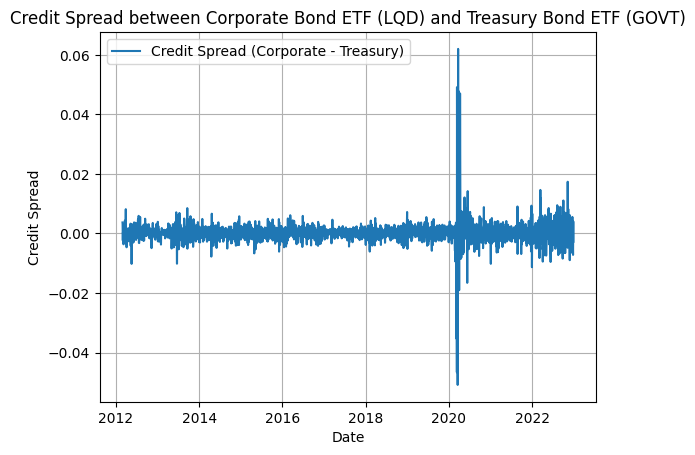

In [1]:

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download historical price data for U.S. corporate bond ETF (LQD) and U.S. Treasury bond ETF (GOVT)
corporate_etf = yf.download("LQD", start="2010-01-01", end="2023-01-01")
treasury_etf = yf.download("GOVT", start="2010-01-01", end="2023-01-01")

# Extract the adjusted close prices and calculate daily returns as a proxy for yields
corporate_yield = corporate_etf['Adj Close'].pct_change().dropna()
treasury_yield = treasury_etf['Adj Close'].pct_change().dropna()

# Align data to ensure consistent dates
aligned_yields = pd.concat([corporate_yield, treasury_yield], axis=1, join="inner")
aligned_yields.columns = ["Corporate Yield", "Treasury Yield"]

# Calculate credit spread
credit_spread = aligned_yields["Corporate Yield"] - aligned_yields["Treasury Yield"]

# Plot the credit spread
plt.plot(credit_spread.index, credit_spread, label="Credit Spread (Corporate - Treasury)")
plt.xlabel("Date")
plt.ylabel("Credit Spread")
plt.title("Credit Spread between Corporate Bond ETF (LQD) and Treasury Bond ETF (GOVT)")
plt.legend()
plt.grid(True)
plt.show()



## 3. Example Credit Spread Arbitrage Strategy

In a credit spread arbitrage strategy, we may take long and short positions on the corporate and treasury ETFs:

- **When Spread Widens**: Go long on the corporate bond ETF (LQD) and short the Treasury bond ETF (GOVT) if the spread is higher than its historical average.
- **When Spread Narrows**: Go short on the corporate bond ETF and long on the Treasury bond ETF if the spread is lower than its historical average.

This strategy aims to capture profits as the spread reverts to its historical mean.



## Summary

In this notebook, we covered:

- **Basics of Credit Spread Arbitrage**: Understanding how to exploit discrepancies in credit spreads.
- **Real Data Analysis**: Using corporate and treasury bond ETFs to analyze yield spreads and identify arbitrage opportunities.
- **Example Arbitrage Strategy**: Simulating a trading strategy based on spread widening and narrowing.

Credit spread arbitrage is a sophisticated strategy often employed by institutional investors to capture market inefficiencies in fixed income markets.
